# DEVELOP A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN BASED ON HISTORICAL CUSTOMER DATA

# IMPORT LIBRARY

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# IMPORT DATASET

In [2]:
df = pd.read_excel("customer_churn_large_dataset (1).xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
# drop non-significant variables

In [4]:
df.drop(["Name" , "CustomerID"], axis=1 , inplace=True)

In [5]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


# DATA PREPROCESSING

## 1. MISSING VALUE TREATMENT

In [6]:
df.isnull().sum()                  # NO missing values

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df.isnull().sum() / len(df) * 100

Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


## 2. ENCODING PART

In [9]:
# GENDER - LABEL ENCODING

In [10]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes

In [11]:
# LOCATION - ONE HOT ENCODER

In [12]:
df = pd.get_dummies(df , columns=["Location"])

In [13]:
# removing dummy variable

df = df.drop(["Location_New York"] , axis=1)     
df.head()   

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami
0,63,1,17,73.36,236,0,0,0,1,0
1,62,0,1,48.76,172,0,0,0,0,0
2,24,0,5,85.47,460,0,0,0,1,0
3,36,0,3,97.94,297,1,0,0,0,1
4,46,0,19,58.14,266,0,0,0,0,1


# 3. HANDLING OUTLIER

In [14]:
# BOXPLOT shows there is no outlier found

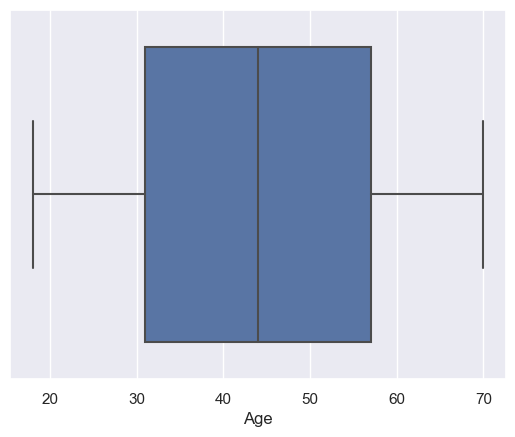

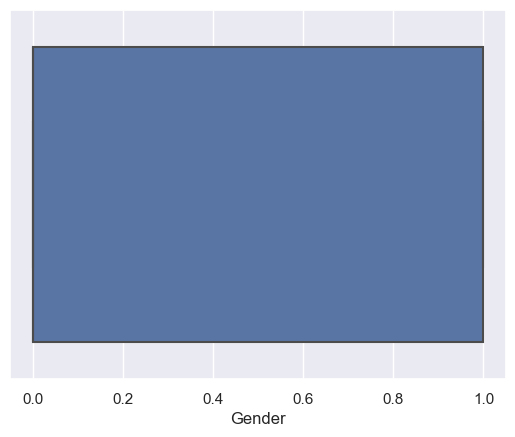

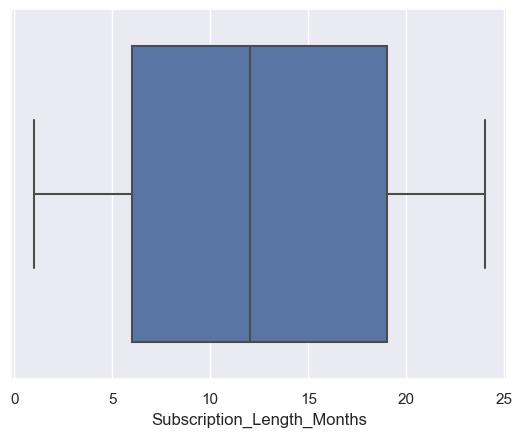

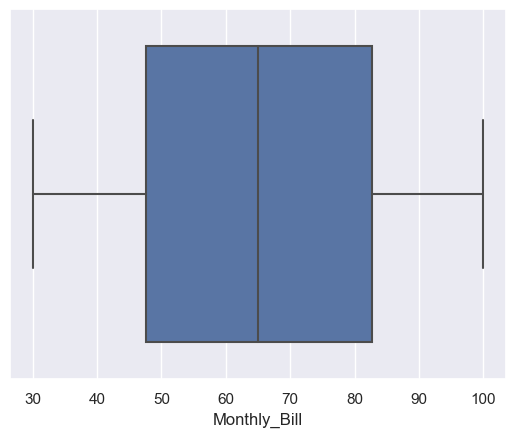

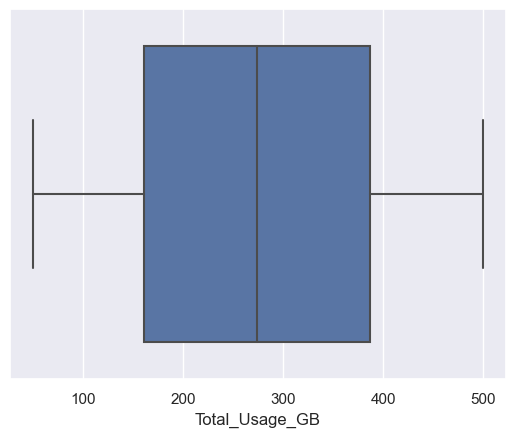

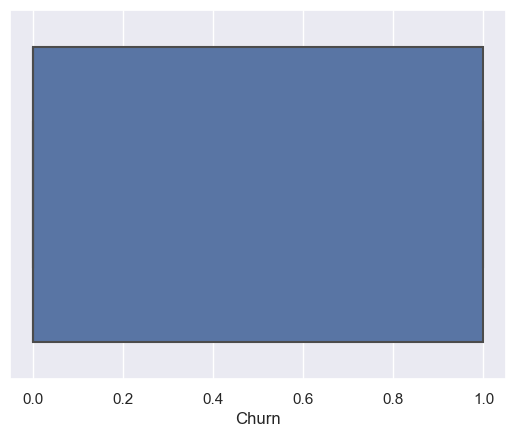

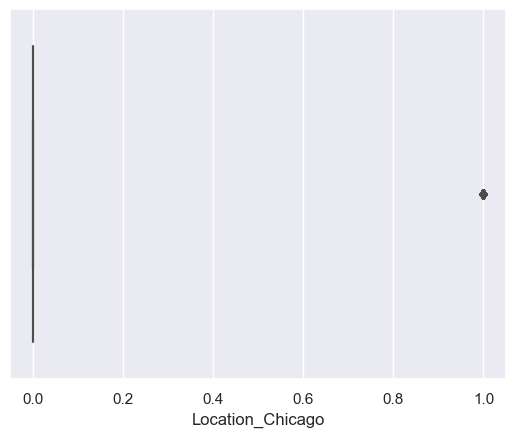

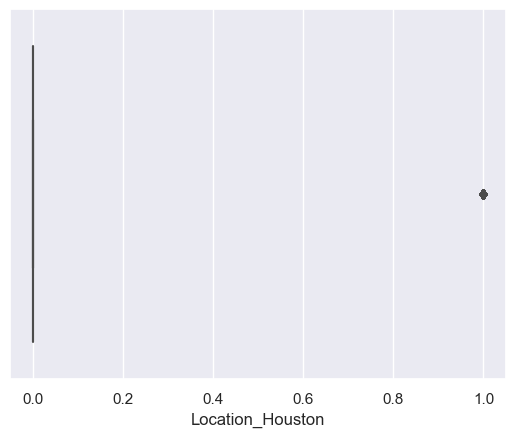

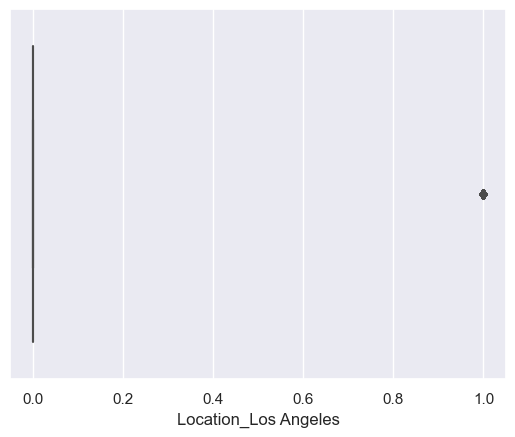

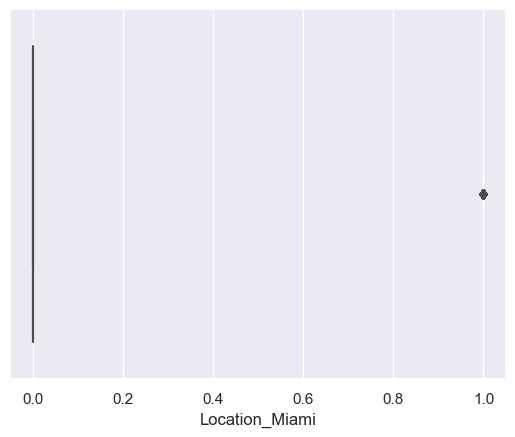

In [15]:
def boxplots(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[:]:
  boxplots(i)

# 4. FEATURE SCALING

In [16]:
x = df.drop(["Churn"] , axis=1)
y = df[["Churn"]]

In [17]:
x.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami
0,63,1,17,73.36,236,0,0,1,0
1,62,0,1,48.76,172,0,0,0,0
2,24,0,5,85.47,460,0,0,1,0
3,36,0,3,97.94,297,0,0,0,1
4,46,0,19,58.14,266,0,0,0,1


In [18]:
y.head()

,Churn
0,0
1,0
2,0
3,1
4,0


In [19]:
# STANDARDIZATION

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)
sc_x.columns = x.columns

In [21]:
sc_x.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami
0,1.241670,1.004329,0.651115,0.410606,-0.294289,-0.499344,-0.502452,1.997441,-0.500484
1,1.176226,-0.995689,-1.658879,-0.805374,-0.784852,-0.499344,-0.502452,-0.500641,-0.500484
2,-1.310651,-0.995689,-1.081380,1.009204,1.422681,-0.499344,-0.502452,1.997441,-0.500484
3,-0.525321,-0.995689,-1.370129,1.625597,0.173279,-0.499344,-0.502452,-0.500641,1.998065
4,0.129120,-0.995689,0.939864,-0.341720,-0.064338,-0.499344,-0.502452,-0.500641,1.998065


# 5. IMBALANCE CHECK

Number of A : 50221
Number of B : 49779


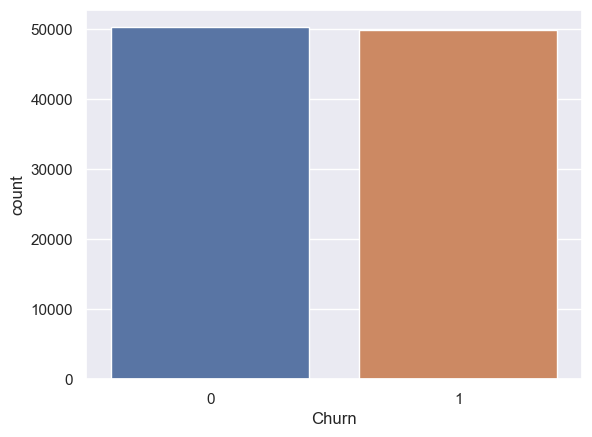

In [22]:
sns.countplot(data=df, x='Churn')
A, B = df['Churn'].value_counts()
print("Number of A :", A)
print("Number of B :",B)
plt.show()

In [23]:
# UNIQUE VALUES 

In [24]:
for i in df.columns:
    print("*************", i ,
          "*************")
    print()
    print(set(df[i].tolist()))
    print()

************* Age *************

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}

************* Gender *************

{0, 1}

************* Subscription_Length_Months *************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}

************* Monthly_Bill *************

{30.5, 31.25, 31.5, 31.0, 34.06, 31.75, 32.5, 37.5, 38.28, 39.69, 32.25, 32.75, 42.56, 43.42, 42.45, 42.92, 46.69, 42.36, 47.22, 49.56, 46.16, 47.67, 51.95, 47.58, 50.44, 53.69, 55.44, 57.31, 58.42, 58.14, 51.5, 61.11, 62.67, 62.45, 64.49, 64.82, 57.94, 58.5, 68.91, 61.25, 70.39, 70.14, 70.11, 70.41, 72.09, 73.36, 73.79, 75.69, 75.74, 77.35, 73.5, 79.82, 81.4, 82.65, 83.31, 81.76, 85.47, 82.74, 79.84, 89.24, 88.49, 82.46, 92.63, 92.38, 92.13, 95.59, 95.09, 90.42, 92.78, 93.91, 94.31, 95.71, 93.39, 97.94, 97.7, 99.79,

# EXPLORATORY ANALYSIS (EDA)

### 1. DISTRIBUTION PLOT

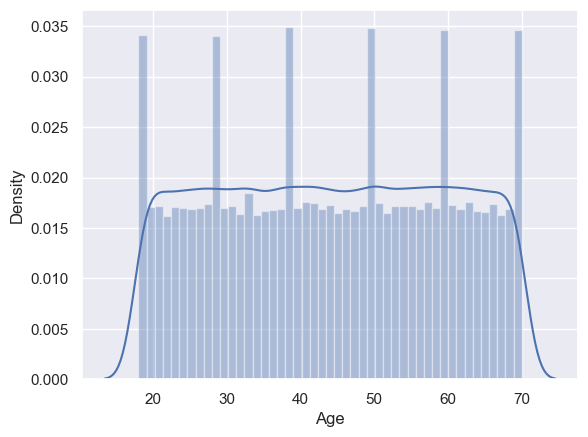

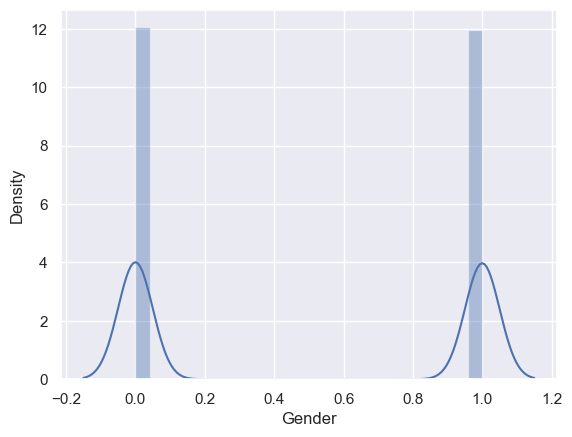

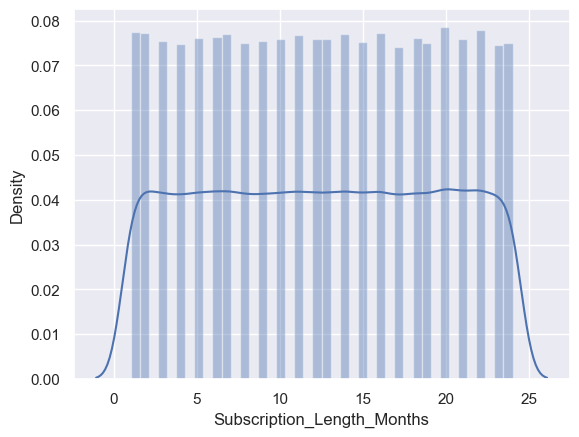

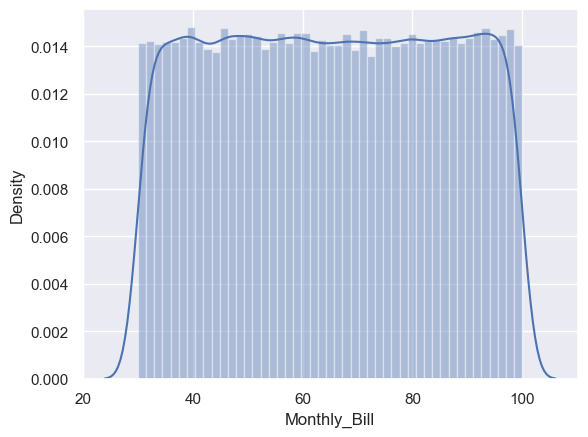

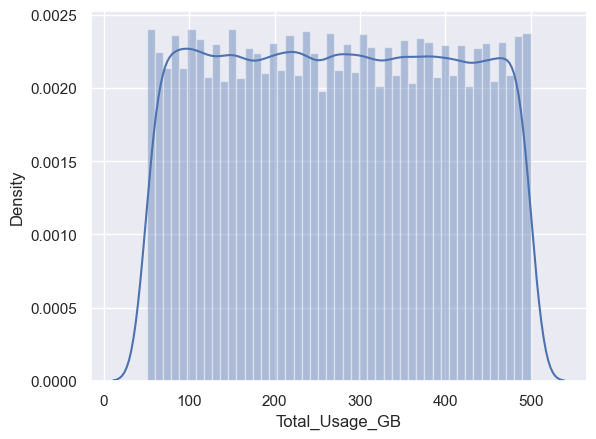

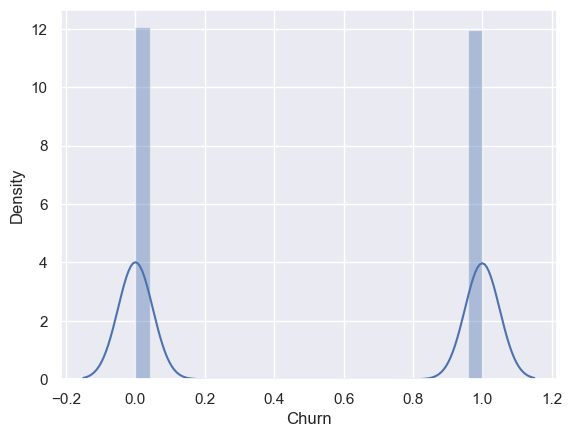

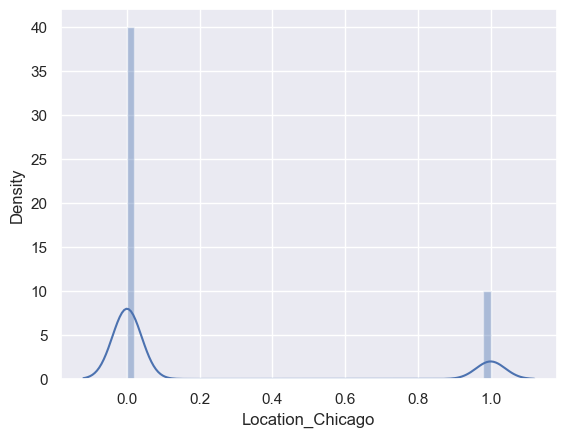

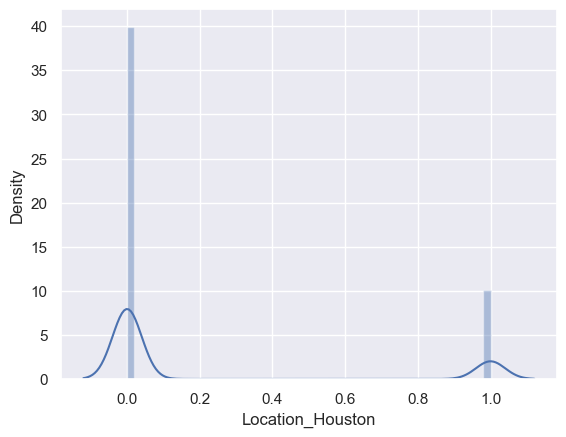

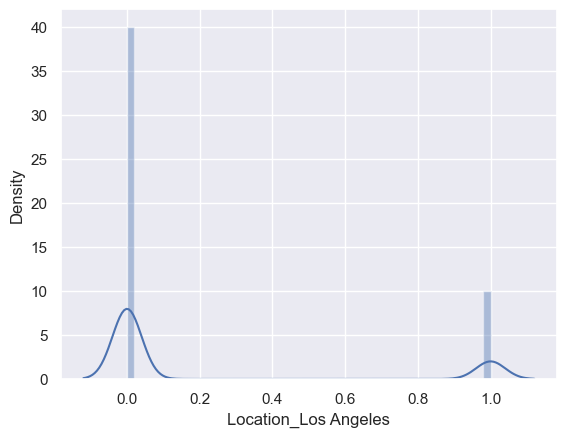

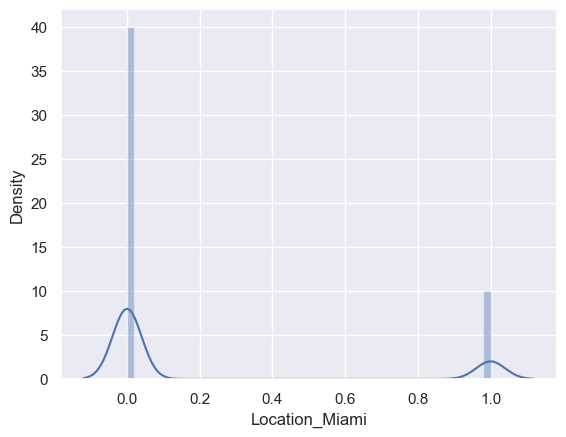

In [25]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

### 2. HEAT MAP - FOR FINDING CORRELATION 

<AxesSubplot:>

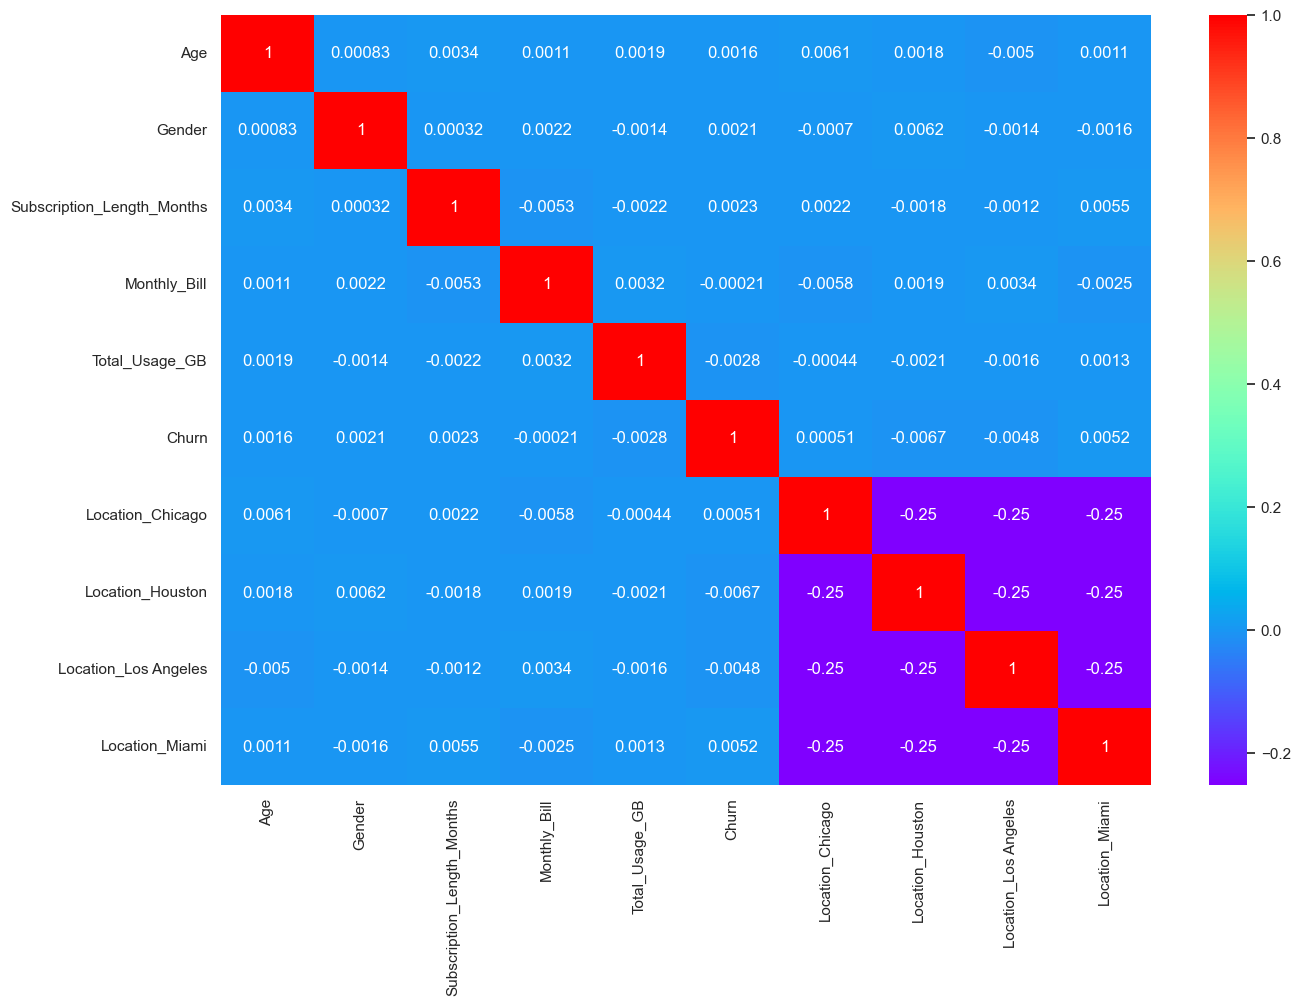

In [26]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

#####                                  -----There is no correlation in this dataset-----

# 3. HISTOGRAM

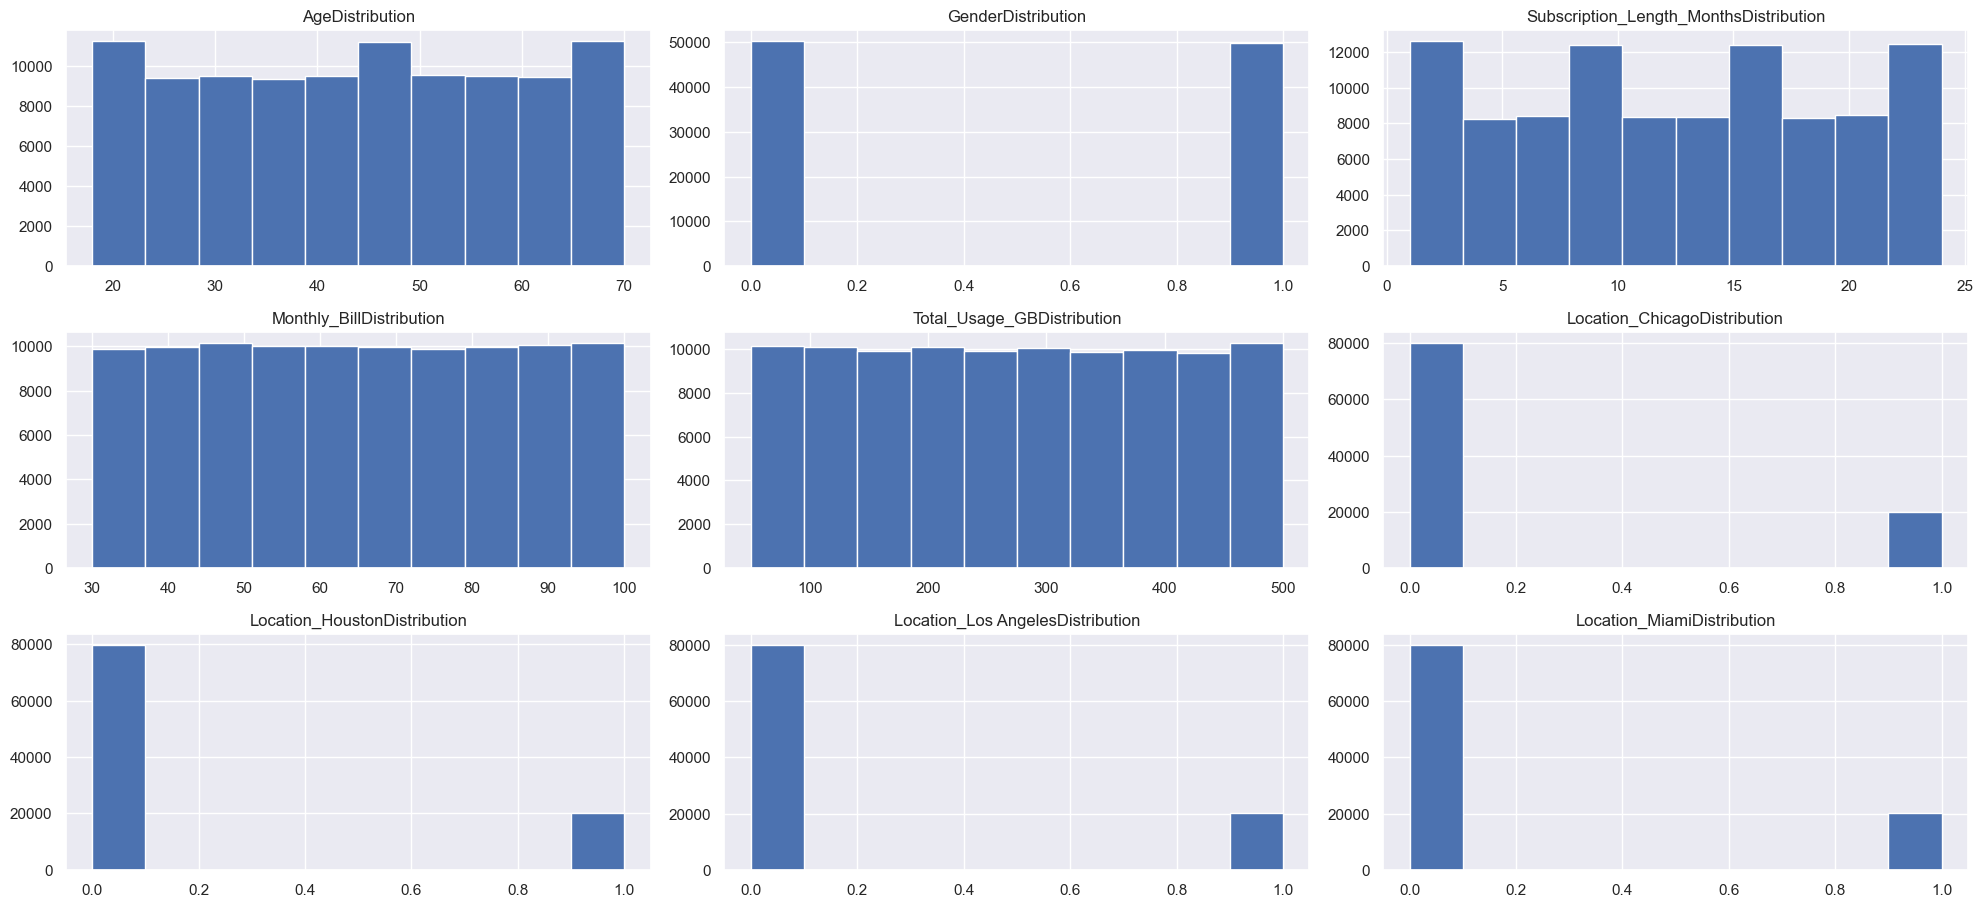

In [27]:
def histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20,15))
    for i , var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name +"Distribution")
    fig.tight_layout()
    plt.show()
    
histograms(df, x, 5,3)

# 4. PAIR PLOT

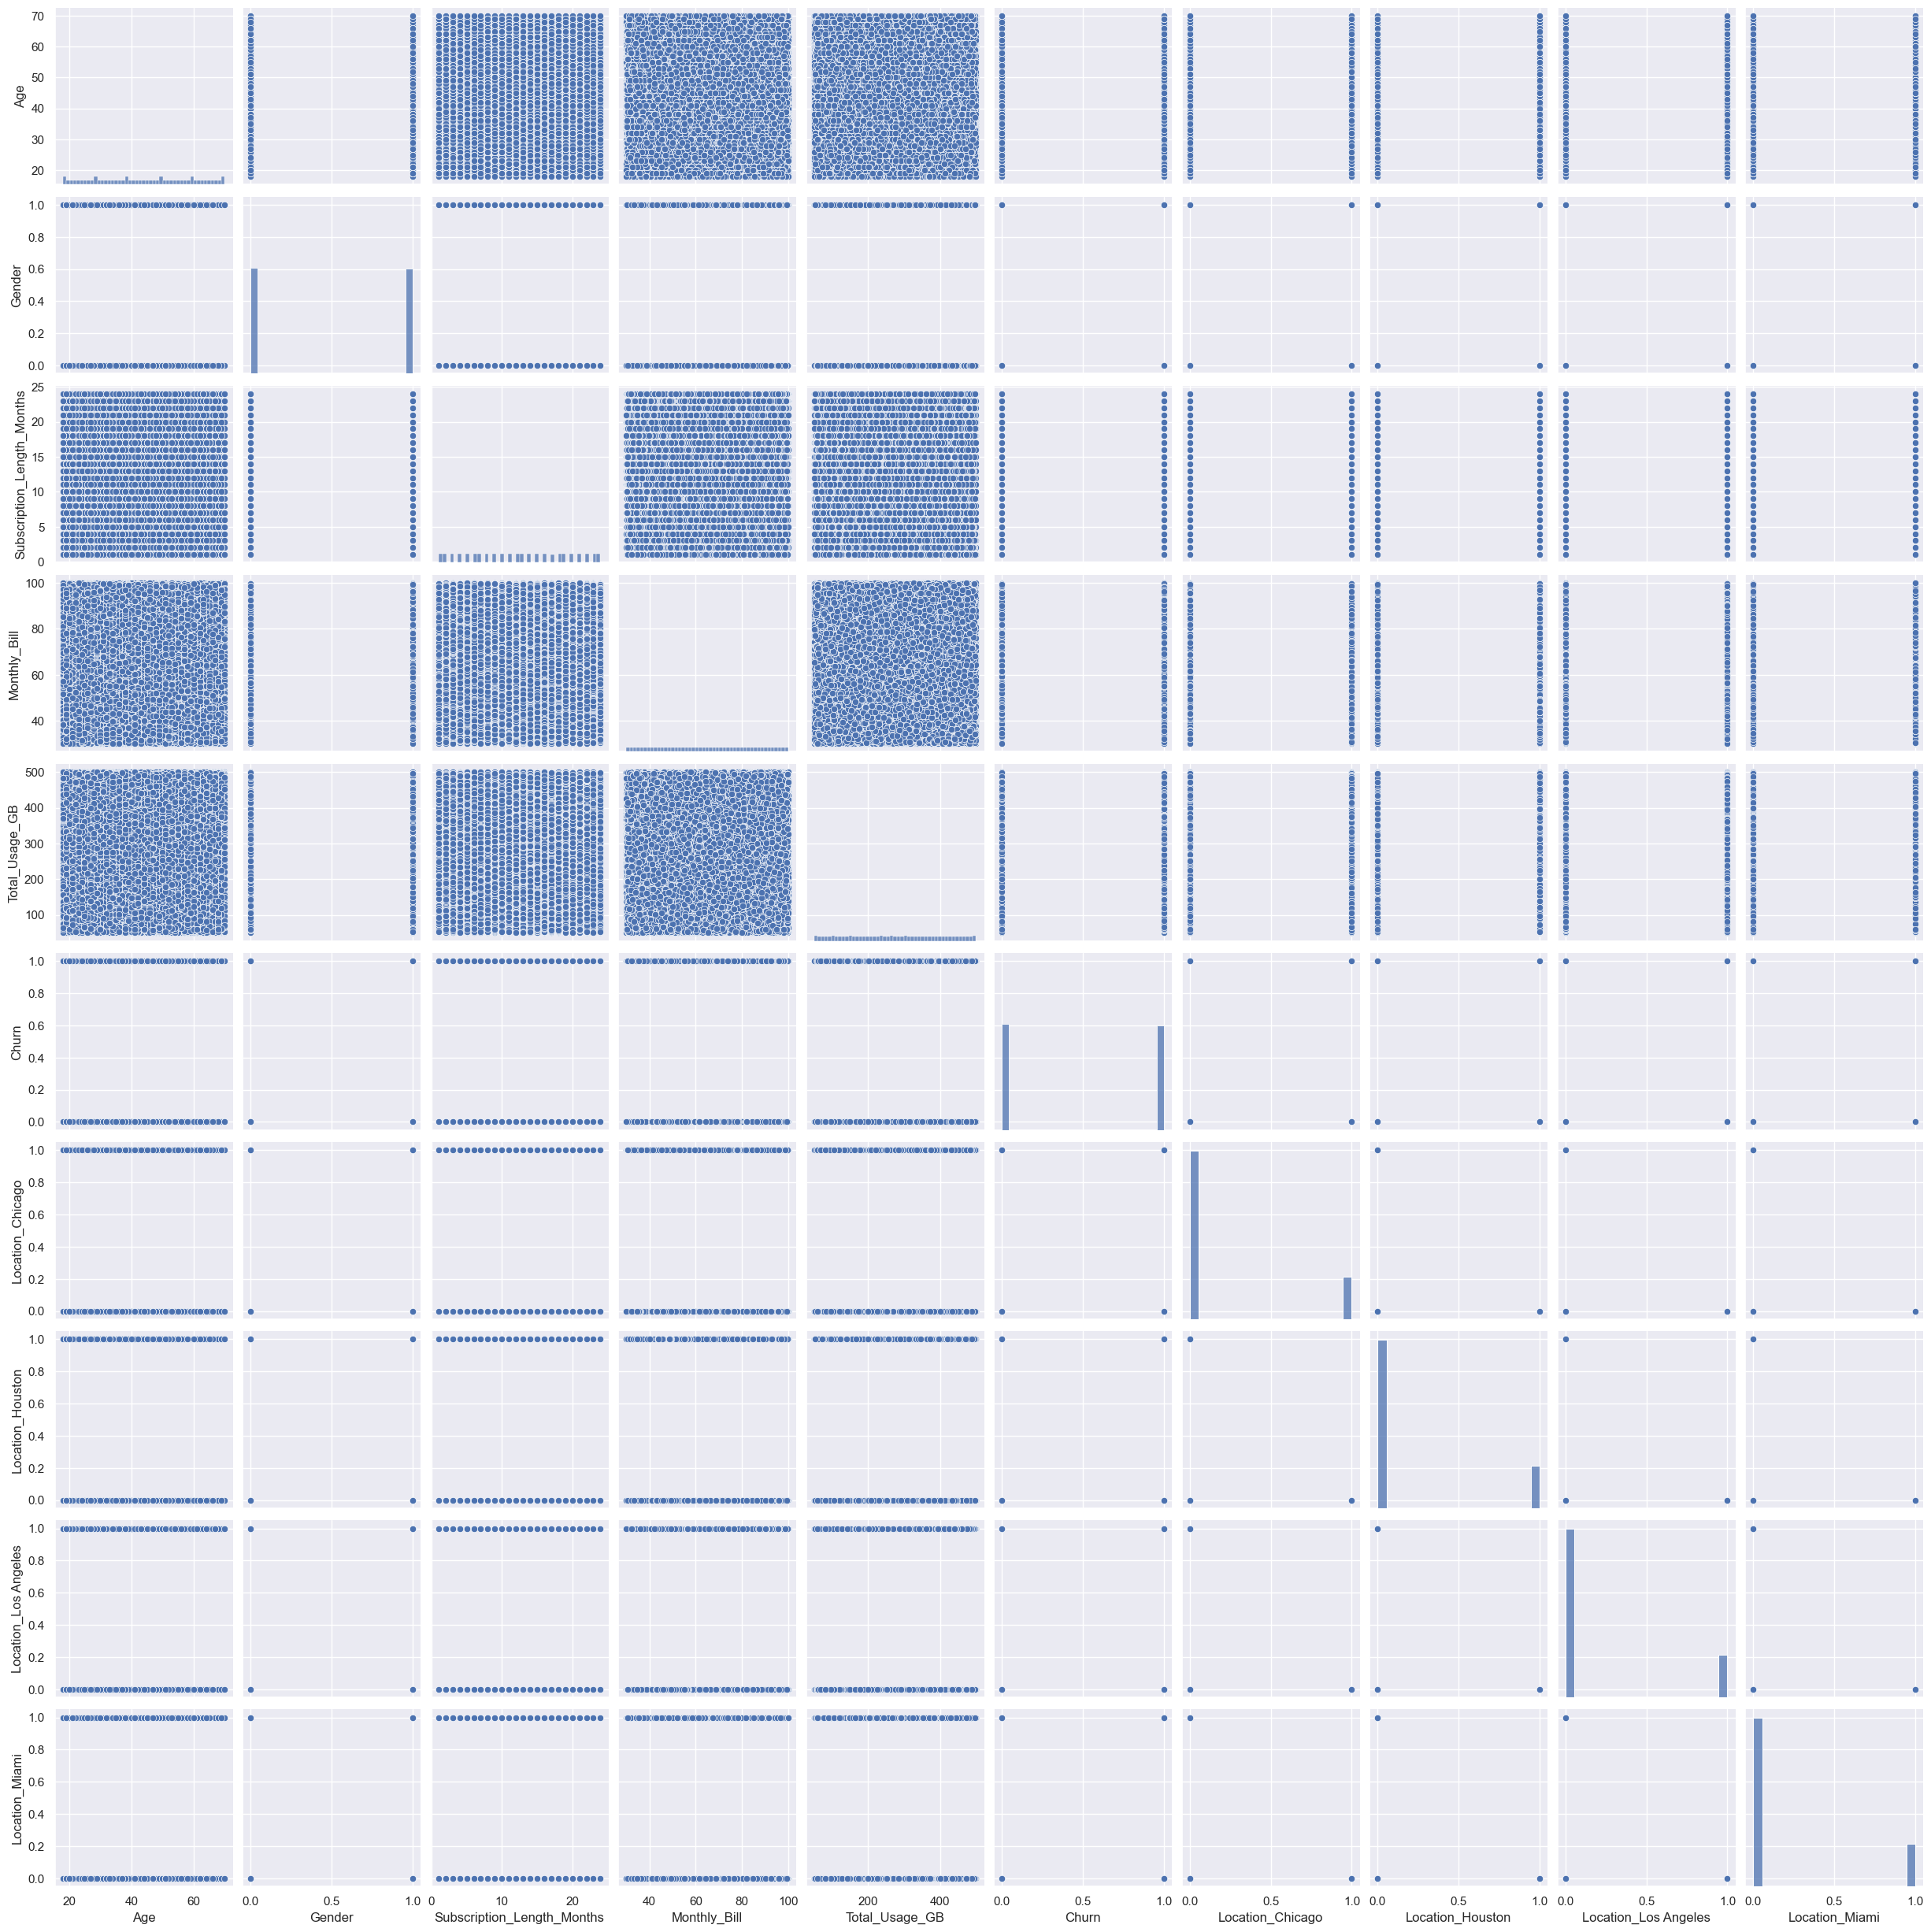

In [28]:
sns.pairplot(df)

# 5. CAT PLOT

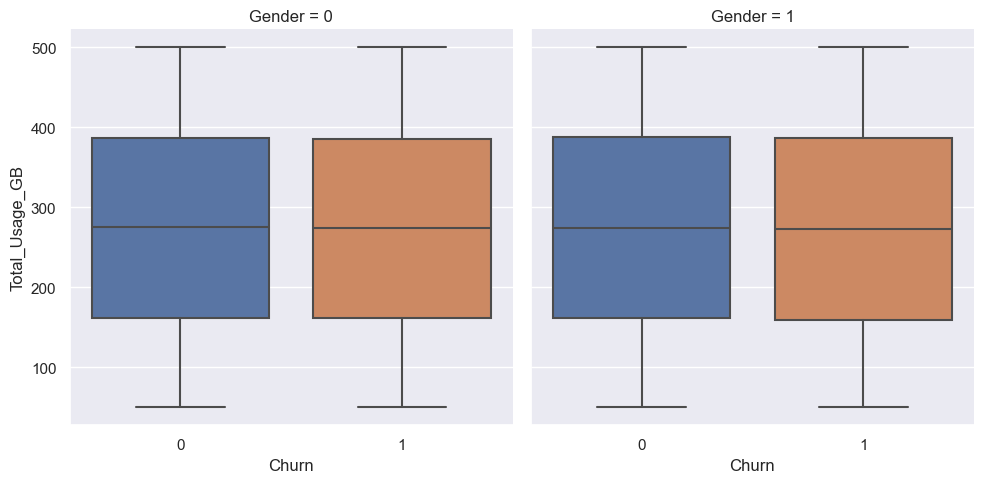

In [29]:
sns.catplot(data=df, x ='Churn', y ='Total_Usage_GB', kind='box', col = 'Gender')
plt.show()

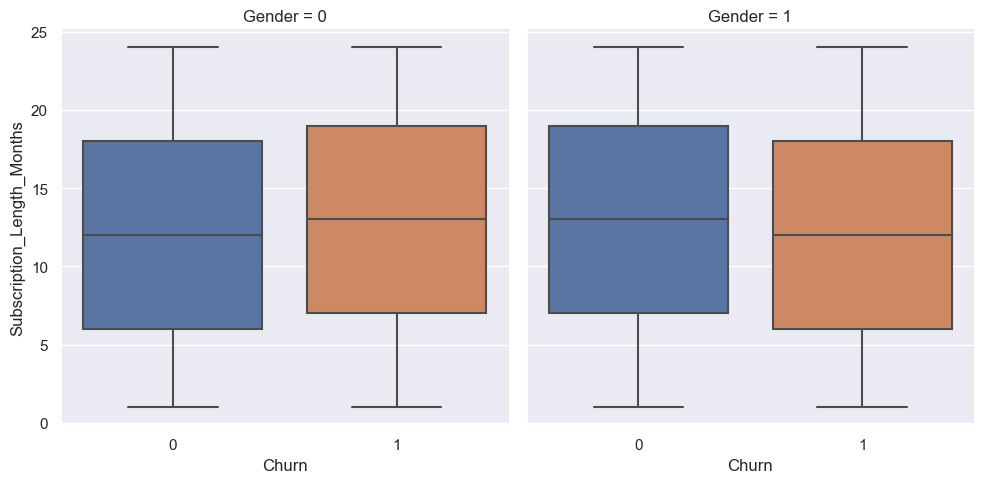

In [30]:
sns.catplot(data=df, x ='Churn', y ='Subscription_Length_Months', kind='box', col = 'Gender')
plt.show()

# ADVANCED EDA

In [31]:
!pip install dtale

In [32]:
import dtale
import dtale.app as dtale_app

In [33]:
dtale.show(df)

# PRINCIPAL COMPONENT ANALYSIS(PCA) - DIMENSIONALITY REDUCTION

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(0.95)
x_pca = pca.fit_transform(sc_x)
print(x.shape)
print(x_pca.shape)

(100000, 9)
(100000, 8)


# SPLIT DATA INTO TRAINING AND TEST

In [36]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test =  train_test_split(x_pca , y, test_size=0.25,
                                                        random_state=101 , stratify=y)

# BUILDING  MODEL  

## 1. LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train , y_train)

LogisticRegression()

In [38]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [40]:
print( confusion_matrix(y_train, y_pred_train_logit))
print("****************"*10)
print(confusion_matrix(y_test, y_pred_test_logit))

[[23935 13731]
 [23346 13988]]
****************************************************************************************************************************************************************
[[7984 4571]
 [7900 4545]]


In [41]:
print( classification_report(y_train, y_pred_train_logit))
print("****************"*5)
print(classification_report(y_test, y_pred_test_logit))

              precision    recall  f1-score   support

           0       0.51      0.64      0.56     37666
           1       0.50      0.37      0.43     37334

    accuracy                           0.51     75000
   macro avg       0.51      0.51      0.50     75000
weighted avg       0.51      0.51      0.50     75000

********************************************************************************
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     12555
           1       0.50      0.37      0.42     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



In [42]:
print("Train accuracy:" , accuracy_score(y_train , y_pred_train_logit))
print("Test accuracy:" , accuracy_score(y_test , y_pred_test_logit))

Train accuracy: 0.50564
Test accuracy: 0.50116


##### CROSS VALIDATION APPROACH

In [43]:
from sklearn.model_selection import cross_val_score
print("train acc:" , np.mean(cross_val_score(logit , x_train , y_train , cv=10)))
print("test acc:" , np.mean(cross_val_score(logit , x_test , y_test , cv=10)))

train acc: 0.50148
test acc: 0.48916000000000004


 ### Logistic regression model accuracy is below 70% .so ,this model is REJECTED.

#  

# 2. DECISION TREE CLASSIFIER MODEL

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [46]:
print("Train accuracy dt:" , accuracy_score(y_train , y_pred_train_dt))
print("Test accuracy dt:" , accuracy_score(y_test , y_pred_test_dt))

Train accuracy dt: 1.0
Test accuracy dt: 0.49696


##### DT model train accuracy is 100% , it is overfitting . so , trying with BAGGING model

#  

# 3. BAGGING CLASSIFIER MODEL

In [47]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [48]:
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [49]:
print(accuracy_score(y_train, y_pred_train_bgg))
print()
print(accuracy_score(y_test, y_pred_test_bgg))

0.98056

0.4992


 ### Hyper parameter tuning

In [50]:
bagging = BaggingClassifier(n_estimators= 5 ,bootstrap=True ,oob_score=False)
bagging.fit(x_train, y_train)
y_pred_train_bgg = bagging.predict(x_train)
print("TRAIN ACCURACY:" , accuracy_score(y_train, y_pred_train_bgg))

TRAIN ACCURACY: 0.94932


#### ---- Training accuracy is 94.8% and test accuracy is 50% only . To improve test accuracy using feature transformation

# FEATURE TRANSFORMATION - YEO JOHNSON METHOD

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
pt = PowerTransformer(method='yeo-johnson')
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.fit_transform(x_test)

In [53]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=4)
bagging.fit(x_test_transformed, y_test)

BaggingClassifier(n_estimators=4)

In [54]:
y_pred_test_bgg1 = bagging.predict(x_test_transformed)

print("TRAIN ACCURACY:" , accuracy_score(y_train, y_pred_train_bgg))
print()
print("TEST ACCURACY:" , accuracy_score(y_test, y_pred_test_bgg1))

TRAIN ACCURACY: 0.94932

TEST ACCURACY: 0.90884


### ---- Concluding this model by obtaining Train accuracy is 94.8% and Test accuracy is 91.1% -----